@author: Ivan + Paul


In [4]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os
from gerrychain import Graph
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [5]:

maup.progress.enabled = True

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
#add the path to the var containing the shapefiles
shapefile_path1 = "./nm_vest_20/nm_vest_20.shp" 
shapefile_path2 = "./nm_pl2020_b/nm_pl2020_p1_b.shp" #Total population counts
shapefile_path5 = "./nm_pl2020_b/nm_pl2020_p4_b.shp" #Hispanic/Latino population data
shapefile_path7 = "./nm_pl2020_cnty/nm_pl2020_cnty.shp" #County shapefile
#read the shapefiles
vest20_df = gpd.read_file(shapefile_path1)
population_df = gpd.read_file(shapefile_path2)
vap_df = gpd.read_file(shapefile_path5)
county_df = gpd.read_file(shapefile_path7)




In [6]:
#read the shapefiles
sen_df = gpd.read_file("./nm_sldu_adopted_2022/SD_221780.shp")
sen_df.columns

Index(['ID', 'AREA', 'DISTRICT', 'MEMBERS', 'LOCKED', 'NAME', 'POPULATION',
       'F18_POP', 'H18_POP', 'F18_AP_IND', 'NH18_WHT', 'NH18_IND', 'NH18_BLK',
       'NH18_ASN', 'NH18_HWN', 'NH18_OTH', 'NH18_2_RAC', 'NH18_POP', 'F18_IND',
       'HISPANIC_O', 'AP_IND', 'NH_WHT', 'NH_IND', 'NH_BLK', 'NH_ASN',
       'NH_HWN', 'NH_OTH', 'NH_2_RACES', 'NOT_HISPAN', 'AMINDIAN',
       'INGRP_CORR', 'DEMPERF', 'REPPERF', 'TOTALPERF', 'DPERFPRESY',
       'RPERFPRESY', 'TPERFPRESY', 'REGDEM', 'REGREP', 'REGDTSOTH', 'REGTOTAL',
       'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'POLSBY_POP', 'F_18_POP',
       'F_H18_POP', 'F_18_AP_IN', 'F_NH18_WHT', 'F_NH18_IND', 'F_NH18_BLK',
       'F_NH18_ASN', 'F_NH18_HWN', 'F_NH18_OTH', 'F_NH18_2_R', 'F_NH18_POP',
       'F_18_IND', 'F_HISPANIC', 'F_AP_IND', 'F_NH_WHT', 'F_NH_IND',
       'F_NH_BLK', 'F_NH_ASN', 'F_NH_HWN', 'F_NH_OTH', 'F_NH_2_RAC',
       'F_NOT_HISP', 'F_AMINDIAN', 'F_INGRP_CO', 'F_DEMPERF', 'F_REPPERF',
       'F_DPERFPRE', 'F_RPERFPRE', 'F

In [7]:
print(population_df.columns)
print(vap_df.columns)
print(vest20_df.columns)
print(county_df.columns)



Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0010001',
       'P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006', 'P0010007',
       'P0010008', 'P0010009', 'P0010010', 'P0010011', 'P0010012', 'P0010013',
       'P0010014', 'P0010015', 'P0010016', 'P0010017', 'P0010018', 'P0010019',
       'P0010020', 'P0010021', 'P0010022', 'P0010023', 'P0010024', 'P0010025',
       'P0010026', 'P0010027', 'P0010028', 'P0010029', 'P0010030', 'P0010031',
       'P0010032', 'P0010033', 'P0010034', 'P0010035', 'P0010036', 'P0010037',
       'P0010038', 'P0010039', 'P0010040', 'P0010041', 'P0010042', 'P0010043',
       'P0010044', 'P0010045', 'P0010046', 'P0010047', 'P0010048', 'P0010049',
       'P0010050', 'P0010051', 'P0010052', 'P0010053', 'P0010054', 'P0010055',
       'P0010056', 'P0010057', 'P0010058', 'P0010059', 'P0010060', 'P0010061',
       'P0010062', 'P0010063', 'P0010064', 'P0010065', 'P0010066', 'P0010067',
       'P0010068', 'P0010069', 'P0010070', 'P0010071', 'geom

In [8]:
#Check the CRS of the shapefiles
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())


In [9]:
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
maup.doctor(sen_df)


100%|██████████| 42/42 [00:00<00:00, 71.95it/s] 


True

In [10]:
maup.doctor(population_df)

100%|██████████| 107215/107215 [01:16<00:00, 1396.57it/s]


True

In [11]:
maup.doctor(vap_df)

100%|██████████| 107215/107215 [01:12<00:00, 1480.20it/s]


True

In [12]:
maup.doctor(county_df)

100%|██████████| 33/33 [00:00<00:00, 289.30it/s]


True

In [13]:
maup.doctor(vest20_df)

100%|██████████| 1917/1917 [00:03<00:00, 544.95it/s]


There are 15 overlaps.
There are 7 holes.


False

In [14]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)


100%|██████████| 33/33 [00:00<00:00, 284.25it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|██████████| 33/33 [00:00<00:00, 51.60it/s]


Identifying overlaps...


100%|██████████| 17087/17087 [00:11<00:00, 1444.15it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 32: 100%|██████████| 6/6 [00:00<00:00, 16.47it/s]


In [15]:
import copy
#copy the final_df to boundaries
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [16]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████| 1917/1917 [00:00<00:00, 2270.72it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|██████████| 4/4 [00:00<00:00, 1210.74it/s]


In [17]:
maup.doctor(final_df)

100%|██████████| 1917/1917 [00:03<00:00, 495.90it/s]


True

In [18]:
#Assign the precincts to the blocks
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, final_df.geometry)

100%|██████████| 1917/1917 [00:18<00:00, 105.86it/s]


In [19]:
blocks_to_precincts_assignment

0          758
1          750
2          757
3         1396
4          693
          ... 
107210     260
107211    1883
107212     243
107213     502
107214     202
Length: 107215, dtype: int64

In [20]:
pop_column_names = ['P0010001', 'P0010002', 'P0010005', 'P0010006', 'P0010007',
                    'P0010008', 'P0010009', 'P0010010', 'P0010011']
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']


In [21]:
#Sum the population and VAP data for each precinct
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    final_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [22]:
print(population_df['P0010001'].sum())
print(final_df['P0010001'].sum())
print(vap_df['P0040001'].sum())
print(final_df['P0040001'].sum())

2117522
2117522
1638989
1638989


In [23]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDHAR': 'G20USSD', 
                                        'G20USSRGRA': 'G20USSR'}
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'P0010001', 'P0010002', 'P0010005', 'P0010006', 'P0010007', 'P0010008',
       'P0010009', 'P0010010', 'P0010011', 'P0040001', 'P0040002', 'P0040005',
       'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'P0040011'],
      dtype='object')

In [24]:
#rename the columns
final_df.rename(columns=rename_dict, inplace = True)
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'P0010001', 'P0010002', 'P0010005', 'P0010006', 'P0010007', 'P0010008',
       'P0010009', 'P0010010', 'P0010011', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [25]:
#final_df.drop(columns=['G20PRELJOR', 'G20PREIPIE', 'G20PREOWRI', 'G20USSOWRI',  
#                       'G20USSRLUM', 'G20USSDDAV', 'G20HALRCHE', 'G20HALDBUL',  
#                       'G20HALLBRU', 'G20HALCHAG', 'G20HALOWRI'], inplace=True)
final_df.columns


Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'P0010001', 'P0010002', 'P0010005', 'P0010006', 'P0010007', 'P0010008',
       'P0010009', 'P0010010', 'P0010011', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [26]:
vap_df.rename(columns=rename_dict, inplace = True)

In [32]:
vest18_df = gpd.read_file("./nm_vest_18/nm_vest_18.shp")
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSDHEI',
       'G18USSRRIC', 'G18USSLJOH', 'G18GOVDLUJ', 'G18GOVRPEA', 'G18ATGDBAL',
       'G18ATGRHEN', 'G18ATGLDUN', 'G18SOSDTOU', 'G18SOSRCLA', 'G18SOSLGRI',
       'G18TREDEIC', 'G18TRERCAS', 'G18AUDDCOL', 'G18AUDRJOH', 'G18LNDDGAR',
       'G18LNDRLYO', 'G18LNDLLUC', 'G18SSCDVIG', 'G18SSCRCLI', 'G18SACDBOG',
       'G18SACRFRE', 'G18SACDMED', 'G18SACRBOH', 'G18SACDZAM', 'G18SACRKIE',
       'G18SACDDUF', 'G18SACRGAL', 'G18SACDATT', 'geometry'],
      dtype='object')

In [33]:
rename_18_dict = {
    'G18GOVDTHR': 'G18GOVD', 
    'G18GOVRGOR': 'G18GOVR', 
    'G18SOSDBYR': 'G18SOSD', 
    'G18SOSRBUC': 'G18SOSR',
    'G18TREDLOW': 'G18TRED', 
    'G18TRERMEI': 'G18TRER', 
    'G18ATGDANA': 'G18ATGD',  
    'G18ATGRWIL': 'G18ATGR'   
}

vest18_df.rename(columns=rename_18_dict, inplace=True)
vest18_df.columns


Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSDHEI',
       'G18USSRRIC', 'G18USSLJOH', 'G18GOVDLUJ', 'G18GOVRPEA', 'G18ATGDBAL',
       'G18ATGRHEN', 'G18ATGLDUN', 'G18SOSDTOU', 'G18SOSRCLA', 'G18SOSLGRI',
       'G18TREDEIC', 'G18TRERCAS', 'G18AUDDCOL', 'G18AUDRJOH', 'G18LNDDGAR',
       'G18LNDRLYO', 'G18LNDLLUC', 'G18SSCDVIG', 'G18SSCRCLI', 'G18SACDBOG',
       'G18SACRFRE', 'G18SACDMED', 'G18SACRBOH', 'G18SACDZAM', 'G18SACRKIE',
       'G18SACDDUF', 'G18SACRGAL', 'G18SACDATT', 'geometry'],
      dtype='object')

In [35]:
columns_to_keep = [
    'STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME',
    'G18USSDHEI', 'G18USSRRIC', 'geometry'
]

columns_to_drop = [col for col in vest18_df.columns if col not in columns_to_keep]

vest18_df.drop(columns=columns_to_drop, inplace=True)
vest18_df.columns


Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSDHEI',
       'G18USSRRIC', 'geometry'],
      dtype='object')

In [42]:
elec2018_cols = ['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSDHEI',
       'G18USSRRIC', 'geometry']

In [37]:
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())
maup.doctor(vest18_df)

100%|██████████| 1492/1492 [00:03<00:00, 453.31it/s] 


True

In [38]:
vest18_df = smart_repair(vest18_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████| 1493/1493 [00:00<00:00, 2025.34it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


In [39]:
maup.doctor(vest18_df)

100%|██████████| 1492/1492 [00:03<00:00, 471.65it/s] 


True

In [40]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|██████████| 1492/1492 [00:10<00:00, 138.37it/s]


In [43]:
#Prorate the election data to the precincts
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
final_df[elec2018_cols] = prorated2018

TypeError: can't multiply sequence by non-int of type 'float'

In [44]:
#Assign the precincts to the districts
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SEND"] = precincts_to_districts_assignment

100%|██████████| 42/42 [00:02<00:00, 15.80it/s]


In [45]:
print(set(final_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}


In [46]:
#Assign the precincts to the districts
district_col_name = "DISTRICT"
for precinct_index in range(len(final_df)):
    final_df.at[precinct_index, "SEND"] = sen_df.at[int(final_df.at[precinct_index, "SEND"]), district_col_name]


In [30]:
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'P0010001', 'P0010002', 'P0010005', 'P0010006', 'P0010007', 'P0010008',
       'P0010009', 'P0010010', 'P0010011', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

[46414, 46284, 45835, 50386, 49378, 51511, 51810, 47712, 52212, 47018, 50376, 51500, 50218, 49446, 48656, 51443, 49032, 50710, 50289, 51380, 51801, 50889, 54738, 50648, 51100, 48462, 51855, 50572, 51784, 48020, 48916, 48530, 51905, 52980, 52817, 50829, 48711, 51938, 52567, 50919, 52799]


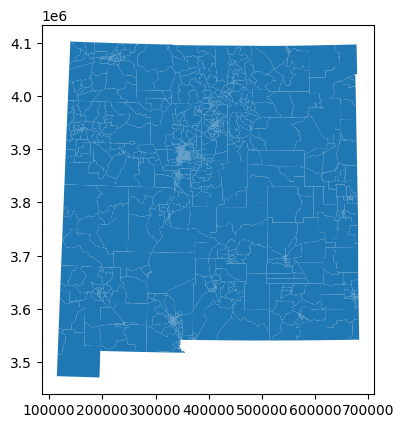

In [47]:
final_df.plot()
pop_vals = [final_df.loc[final_df["SEND"] == str(n), "P0010001"].sum() for n in range(1, 42)]
print(pop_vals)